# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [20]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.stats

In [22]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [23]:
df.shape

(130, 3)

## 1. Is the distribution of body temperatures normal?
Make a histogram of the sample data, the temperature is normally distributed. 

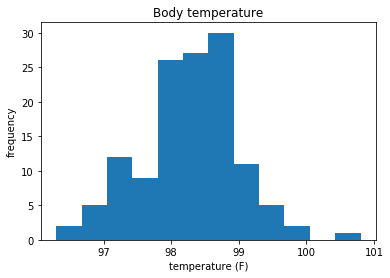

In [24]:
plt.hist(df.temperature, bins=12)
plt.xlabel('temperature (F)')
plt.ylabel('frequency')
plt.title('Body temperature')

By doing a morability test, pvalue = 0.25, implicting the distribution of the sample may not be normal.

In [25]:
import scipy.stats as stats
X = df['temperature'].values
stats.mstats.normaltest(X)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

## 2. Is the sample size large? Are the observations independent?

The samples size, 130, is above 30, thus considered large enough to meet the condition of CLT. 
The observations are independent as the occurrence of one observation provides no information about the occurrence of the other observation.

## 3. Is the true population mean really 98.6 degrees F?

### Approach 1: Confidence Interval

In [26]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h

Compute 95% CI

In [27]:
mean_confidence_interval(df['temperature'], confidence=0.95)

(98.249230769230749, 98.122002905608014, 98.376458632853485)

Compute 90% CI

In [28]:
mean_confidence_interval(df['temperature'], confidence=0.9)

(98.249230769230749, 98.142694324134865, 98.355767214326633)

In either CI, 98.6 degrees F is out of range. The true population mean may be wrong since it is 100 years out of date. Or it is possibly due to sampling bias. At this point, it worth looking into if any relationship of group membership and body temperature. 

### Approach 2: t-test

To test whether the sample mean (98.25) is different from the population mean (98.60), here I use one-sample t-test. The reason to choose this is because the population distribution is close to normal, and the sample is from a single treatment group. With a p-value < 1%, we can draw the similar conclusion that the sample mean is statistically different from population mean.

In [29]:
scipy.stats.ttest_1samp(df['temperature'], 98.60)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

## 4. At what temperature should we consider someone's temperature to be "abnormal"?

Assuming that these data are representative of the population, someone's temperature out of 90% CI [98.142694324134865, 98.35576721432663] may be considered "abnormal".

## 5. Is there a significant difference between males and females in normal temperature?

In [30]:
#obtain temperature data for female and male
temp_F = df.loc[df['gender'] == 'F', 'temperature']
temp_M = df.loc[df['gender'] == 'M', 'temperature']

With a two-sample t-test below we compute p-value = 2.4%. The result is a little less extreme, and may be worth discussion on whether there is a true difference.

In [31]:
scipy.stats.ttest_ind (temp_F, temp_M)

Ttest_indResult(statistic=2.2854345381656103, pvalue=0.023931883122395609)